In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy
import scipy
import math
import matplotlib as mpl
import matplotlib.dates as mpd
import pylab as plt
import datetime as dtm
import pytz
import multiprocessing as mpp
import pickle
import sys
import os
#import socket
#import lmod
# lmod.load('system')
# lmod.load('texlive')
# lmod.
#
# TODO: phase out unreferenced hpc_lib calls...
import hpc_lib
import hpc_reports
#
# def running_mean(X,n=10):
#     return (numpy.cumsum(numpy.insert(X,0,0))[n:] - numpy.cumsum(numpy.insert(X,0,0))[:-n])/n
# #

/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2689: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2704: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit


In [3]:
# import socket
# socket.gethostname()

In [22]:
n_cpus = 4
#print('** epoch: {}'.format(mpd.get_epoch()))
if 'SLURM_CPUS_PER_TASK' in os.environ.keys():
    n_cpus = int(os.environ['SLURM_CPUS_PER_TASK'])
#
print(f'*** n_cpus: {n_cpus}')

*** n_cpus: 8


In [23]:
N_report_len = 180
end_dtm = dtm.datetime(2023,9,14)
end_date = end_dtm.date()
start_date = end_date - dtm.timedelta(days=N_report_len)
print('*** dates: {} - {}'.format(start_date, end_date))
#delim_sacct='|'
delim_sacct='*'
partition='serc'
#partition=None
group=None
s_user=None
verbose=0
# group='oneillm'
# group='edunham'
#s_user = 'labraha2'
#
sacct_h5_file = f'sacct_data/sacct_sherlock_p{str(partition).upper()}_g{str(group).upper()}_u{s_user}_{start_date.year:04}{start_date.month:02}{start_date.day:02}_{end_dtm.year:04}{end_dtm.month:02}{end_dtm.day:02}.h5'
print(f'*** sacct_h5_file [{os.path.isfile(sacct_h5_file)}]: {sacct_h5_file}')

*** dates: 2023-03-18 - 2023-09-14
*** sacct_h5_file [False]: sacct_data/sacct_sherlock_pSERC_gNONE_uNone_20230318_20230914.h5


In [24]:
# NOTE: to get individual users, eg to get Eric's group usage:
#. sacct --allusers --user=labraha2 --start=2022-01-01 --end=2022-06-15
#
# NOTE: additional options can be passed in the more_options=[] arrary, or just as sacct_{option-name}={val}
#
if os.path.isfile(sacct_h5_file):
    print('*** Creating SACCT object from HDF5 {}'.format(sacct_h5_file))
    SACCT_obj = hpc_lib.SACCT_data_from_h5(sacct_h5_file, keep_raw_data=False, n_cpu=n_cpus)
    #
    
else:
    print('*** Fetching SACCT data directly')
    SACCT_obj = hpc_lib.SACCT_data_direct(group=group, partition=partition, start_date=str(start_date),
                                          n_cpu=n_cpus, verbose=verbose, delim=delim_sacct,
                                          end_date=str(end_date), keep_raw_data=False)
    # , sacct_user=s_user
    print(f'** writing HDF5: {sacct_h5_file}')
    SACCT_obj.write_hdf5(sacct_h5_file)
    #
#
print('** ', SACCT_obj.jobs_summary.dtype.names)

*** Fetching SACCT data directly
***  2023-03-18 00:00:00+00:00 <class 'datetime.datetime'> 2023-09-14 00:00:00+00:00 <class 'datetime.datetime'>
*** DEBUG: Now execute load_sacct_data(); options_str= --partition=serc  --delimiter="*" 
*** DEBUG: load_sacct_data() executed. Compute calc_jobs_summary()
*** DEBUG: data stuff:  5681081 (numpy.record, [('index', '<i8'), ('User', 'O'), ('Group', 'O'), ('GID', 'O'), ('Account', 'O'), ('JobID', 'O'), ('JobIDRaw', 'O'), ('Partition', 'O'), ('State', 'O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('ReqMem', '<f8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'O'), ('Suspended', 'O'), ('ReqTRES', 'O'), ('AllocTRES', 'O'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), ('MaxDiskRead', '<f8'), ('AveDiskWrite', '<f8'), ('AveDis

/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3050: RuntimeWarning: All-NaN slice encountered
  jobs_summary[cls][k] = tuple([f(sub_data[n2]) for (n1, n2, f) in js_col_f])
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3050: RuntimeWarning: All-NaN slice encountered
  jobs_summary[cls][k] = tuple([f(sub_data[n2]) for (n1, n2, f) in js_col_f])
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2872: RuntimeWarning: invalid value encountered in cast
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2872: RuntimeWarning: All-NaN slice encountered
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3050: RuntimeWarning: All-NaN slice encountered
  jobs_summary[cls][k] = tuple([f(sub_data[n2]) for (n1, n2, f) in js_col_f])
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2872: RuntimeWarning: invalid value encountered in cast
  ('NTasks',    

** writing HDF5: sacct_data/sacct_sherlock_pSERC_gNONE_uNone_20230318_20230914.h5
*** DEBUG: updating column [index], type=<i8
*** DEBUG: updating column [User], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Group], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [GID], type=('|S6', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Account], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [JobID], type=('|S77', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [JobIDRaw], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Partition], type=('|S4', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [State], type=('|S19', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Timelimit], type=<f8
*** DEBUG: updating column [NCPUS], type=<i8
*** DEBUG: updating column [ReqMem], type=<f8
*** DEBUG: updating column [NNodes], type=<i8
*** DEBUG: updating column [Submit], type=<f8
*** DEBUG: updati

In [25]:
SP=hpc_lib.SH_PART_obj()

In [34]:
print('*** ', SACCT_obj.jobs_summary.dtype.names)

***  ('index', 'User', 'Group', 'GID', 'Account', 'JobID', 'JobIDRaw', 'Partition', 'State', 'Timelimit', 'NCPUS', 'ReqMem', 'NNodes', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed', 'SystemCPU', 'UserCPU', 'TotalCPU', 'NTasks', 'CPUTimeRAW', 'Suspended', 'ReqTRES', 'AllocTRES', 'MaxRSS', 'AveRSS', 'AveVMSize', 'MaxVMSize', 'MaxDiskWrite', 'MaxDiskRead', 'AveDiskWrite', 'AveDiskRead', 'JobID_parent', 'NGPUs')


In [35]:
n_cpus_serc = SP.get_total_cpus(partitions='serc')
n_gpus_serc = SP.get_total_gpus(partitions='serc')
#
print(f'** n_cpus: {n_cpus_serc}, n_gpus: {n_gpus_serc}')
#
print('*** ', SP.SP)

** n_cpus: 9104, n_gpus: 92
***         partition_name partition_public  nodes_idle  nodes_total  \
normal         normal              yes           0          179   
bigmem         bigmem              yes           0            9   
gpu               gpu              yes           0           26   
dev               dev              yes           2            4   
hns               hns               no           1          105   
serc             serc               no           0          233   
owners         owners               no           9         1471   

        cpu_cores_idle  cpu_cores_total  cpu_cores_queued  gpus_idle  \
normal             171             4820              4602          0   
bigmem             284              504                48          0   
gpu                131              748               228         53   
dev                 86              104                 0         64   
hns               1833             3728               891          0  

In [36]:

print('** ', SACCT_obj.jobs_summary.dtype)
print('** ', type(SACCT_obj.jobs_summary['User'][0]))
#
# my_ary = numpy.array(len(SACCT_obj.jobs_summary), dtype=SACCT_obj.jobs_summary.dtype)
# print('** ', my_ary.dtype)
#
for cl,tp in SACCT_obj.jobs_summary.dtype.descr:
    print('** ', cl, tp)
    
#
print('** ** ', SACCT_obj.jobs_summary['Group'].astype(str)[0])


**  [('index', '<i8'), ('User', 'O'), ('Group', 'O'), ('GID', 'O'), ('Account', 'O'), ('JobID', 'O'), ('JobIDRaw', 'O'), ('Partition', 'O'), ('State', 'O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('ReqMem', '<f8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'O'), ('Suspended', 'O'), ('ReqTRES', 'O'), ('AllocTRES', 'O'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), ('MaxDiskRead', '<f8'), ('AveDiskWrite', '<f8'), ('AveDiskRead', '<f8'), ('JobID_parent', 'O'), ('NGPUs', '<i8')]
**  <class 'str'>
**  index <i8
**  User |O
**  Group |O
**  GID |O
**  Account |O
**  JobID |O
**  JobIDRaw |O
**  Partition |O
**  State |O
**  Timelimit <f8
**  NCPUS <i8
**  ReqMem <f8
**  NNodes <i8
**  Submit <f8
**  Eligible <f8
**  Start <f8
**  End <f8
**  Elapsed <f8
**  SystemC

*** DEBUG t_now: 19613.561635313356, t_max: 19613.49607638889


/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3478: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lbls)


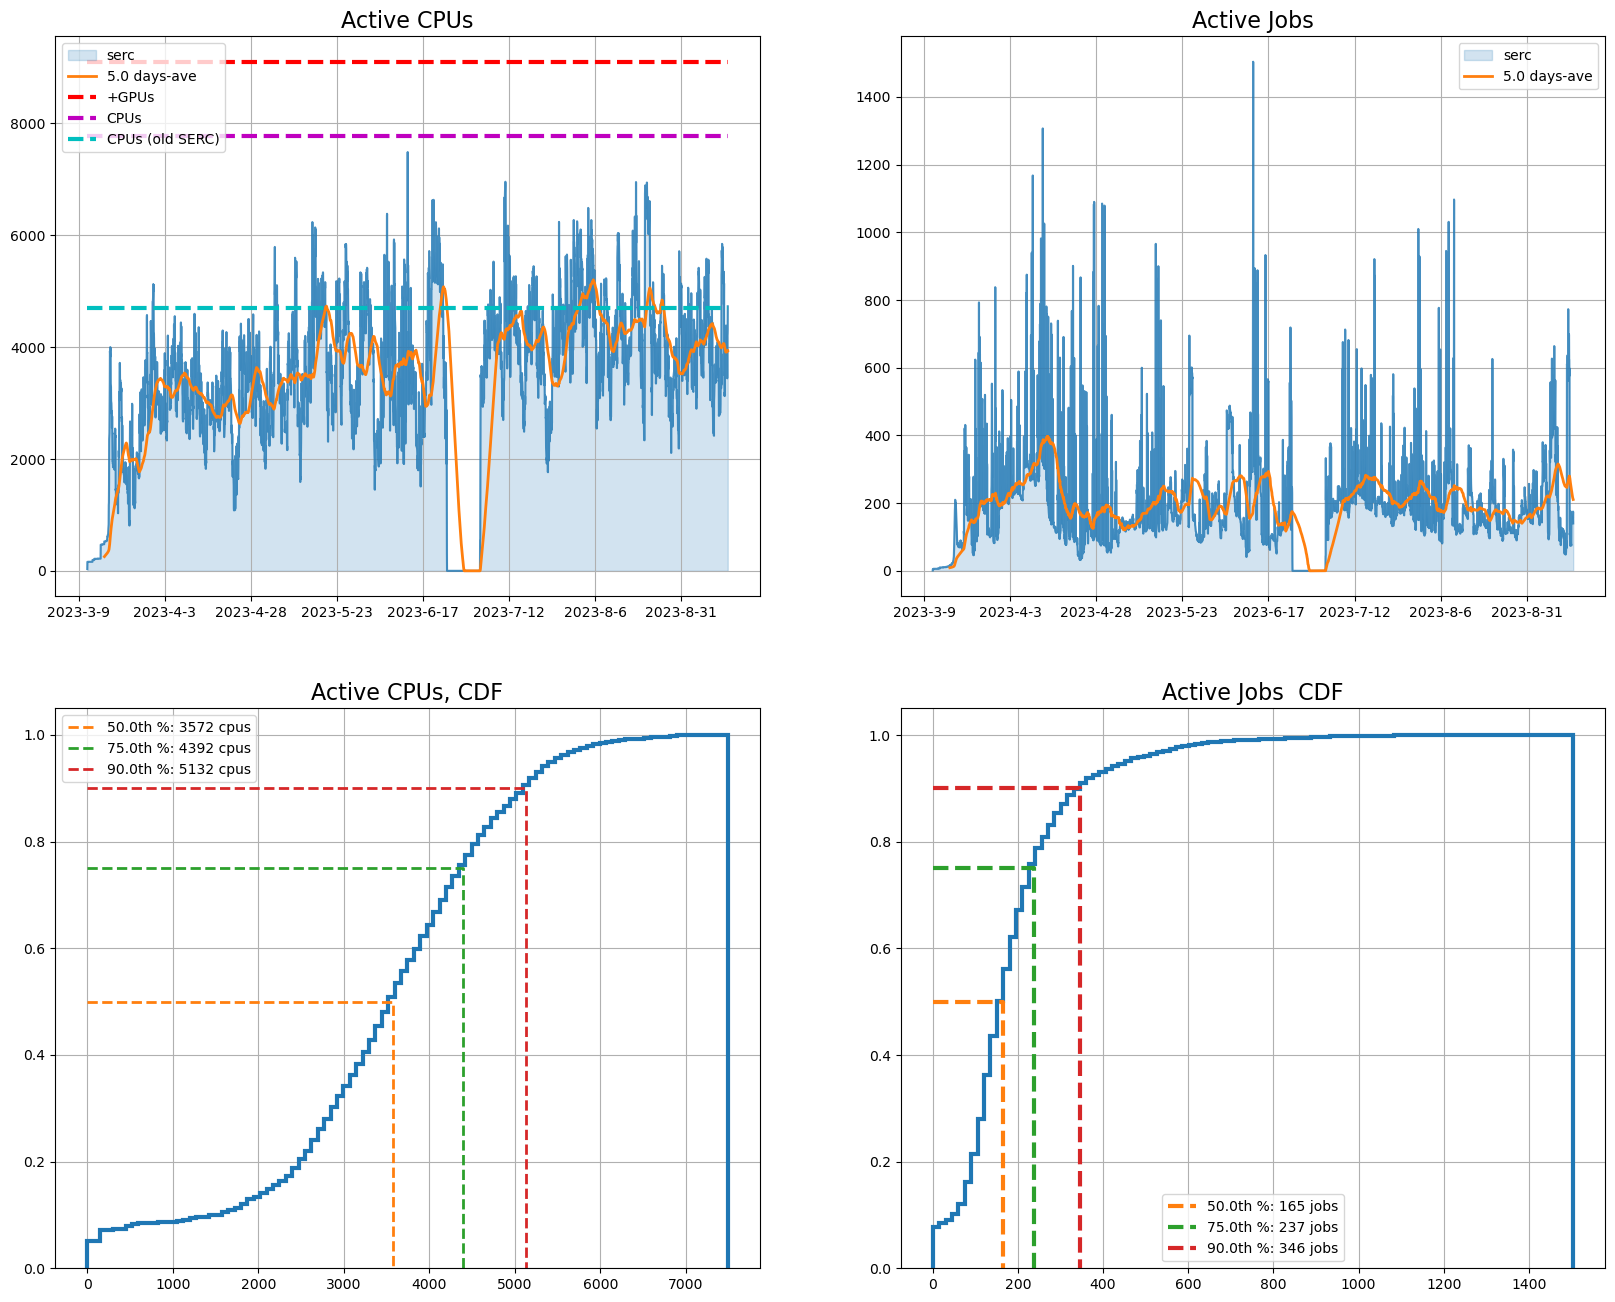

In [37]:
rep_cpu_lc = SACCT_obj.report_activecpus_jobs_layercake_and_CDFs(group_by='Partition')
#
# plot total CPUs in partition. Also, subtract CPUs associated with GPUs. For now, this is just
#. something we know. we will need to work harder to get it from data.
ax = rep_cpu_lc.axes[0]
ln = ax.lines[0]
#
x_max_cpus = numpy.array([ax.lines[0].get_xdata()[0], ax.lines[0].get_xdata()[-1]])
ax.plot( x_max_cpus, numpy.ones(2)*n_cpus_serc, ls='--', lw=3.,
       color='r', label='+GPUs')

ax.plot( x_max_cpus, numpy.ones(2)*n_cpus_serc-(10*128 + 2*24), ls='--', lw=3.,
       color='m', label='CPUs')
#
ax.plot( x_max_cpus, numpy.ones(2)*n_cpus_serc-(10*128 + 2*24 + 96*32), ls='--', lw=3.,
       color='c', label='CPUs (old SERC)')

ax.legend(loc='upper left')

In [38]:
fg_cpuhlc = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='Partition', autopct='%1.1f%%')

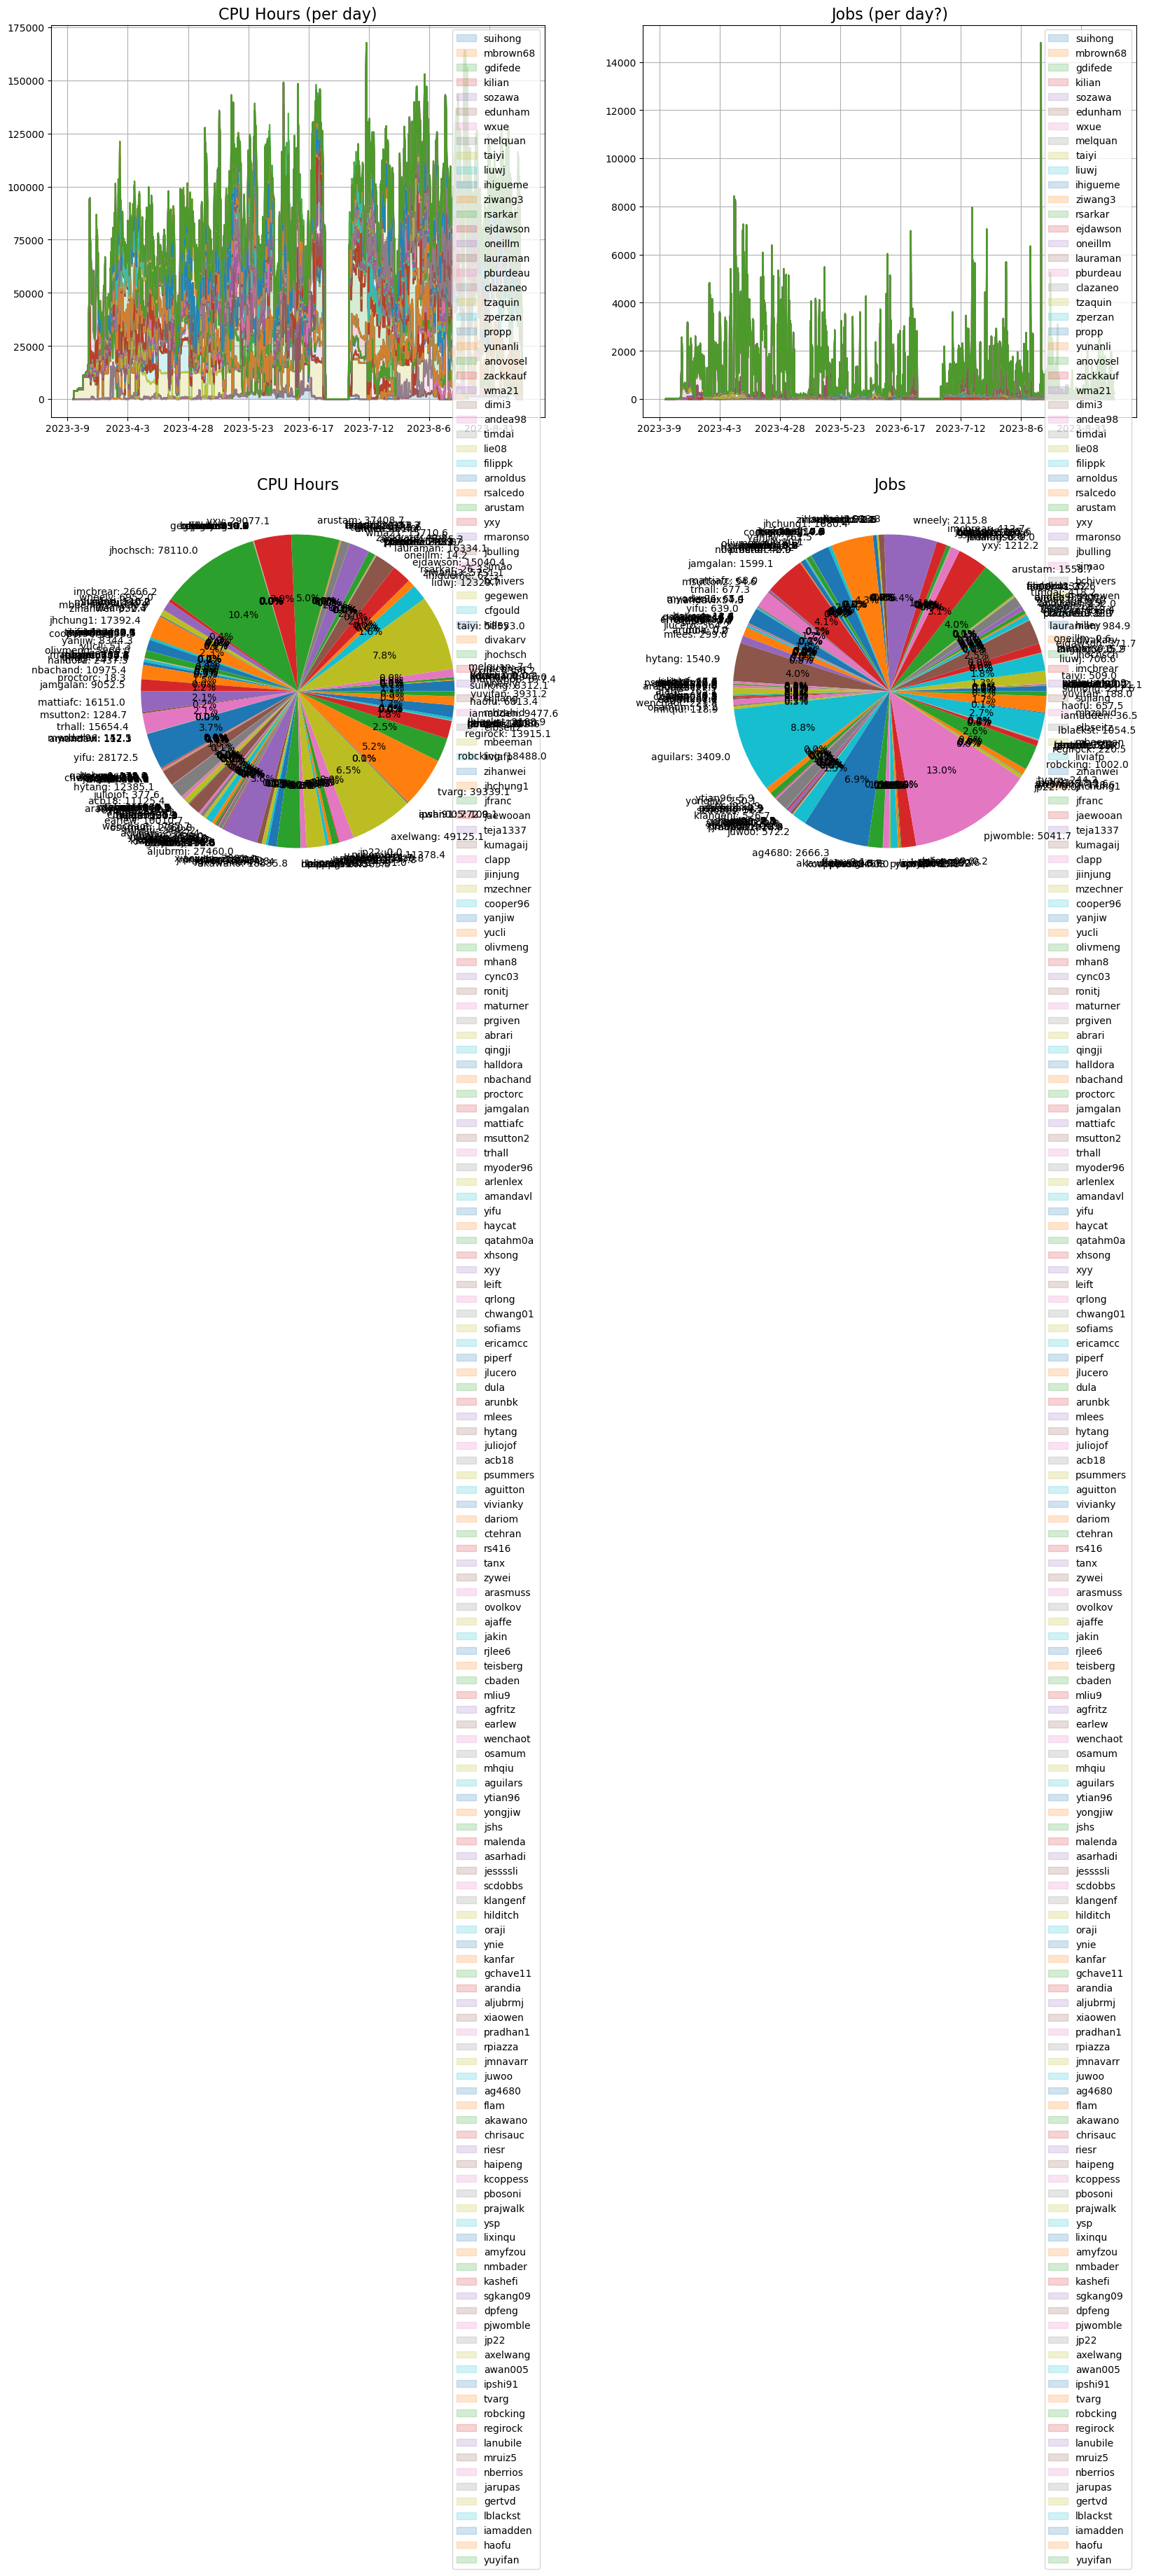

In [39]:
fg_cpuhl_u = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='User', autopct='%1.1f%%')

In [40]:
fg_cpuhl_acct = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='Account')
fg_cpu_lc_acct = SACCT_obj.report_activecpus_jobs_layercake_and_CDFs(group_by='Account')

*** DEBUG t_now: 19613.564076659884, t_max: 19613.49607638889


In [41]:
fg_cpuhl_acct = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='Group')
fg_cpu_lc_acct = SACCT_obj.report_activecpus_jobs_layercake_and_CDFs(group_by='Group')

TypeError: First element of field tuple is neither a tuple nor str

### User stat table
- Generate a table of summary user stats

In [42]:
#
cpuh_pie_user = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed']*SACCT_obj['NCPUS'],
                                       slice_data=SACCT_obj['User'])
jobs_pie_user = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed'], slice_data=SACCT_obj['User'])
#

*** CPU-hours: 
Name;cpu-hours;job-hours;n_jobs;last_job_start;Group;Accounts;Partitions
jhochsch;78109.9790625;147.56773148148147;448;2023-09-13 08:40:18+00:00;gorle;gorle;serc
taiyi;58552.97230324075;508.9529976851851;205;2023-09-01 20:45:33+00:00;segall;segall;serc
axelwang;49125.0731712963;138.60671296296294;186;2023-09-07 11:28:20+00:00;sklemp;sklemp;serc
tvarg;39339.107777777775;244.22628472222218;420;2023-09-12 10:06:02+00:00;gorle;gorle;serc
arustam;37408.690046296295;1558.735659722222;3493;2023-09-12 13:06:07+00:00;biondo;biondo;serc
yxy;29077.09509259259;1212.2278819444446;588;2023-09-12 00:40:30+00:00;robertj2;robertj2;serc
yifu;28172.47071759259;638.9828587962963;1365;2023-09-06 18:39:57+00:00;lou;lou;serc
aljubrmj;27459.983888888888;122.81378472222224;431;2023-09-01 07:47:23+00:00;horne;horne;serc
akawano;18535.823842592592;589.4520023148148;882;2023-09-08 10:46:42+00:00;mburke;mburke;serc
robcking;18488.005243055555;1001.968425925926;2537;2023-09-05 20:48:37+00:00;aditis2

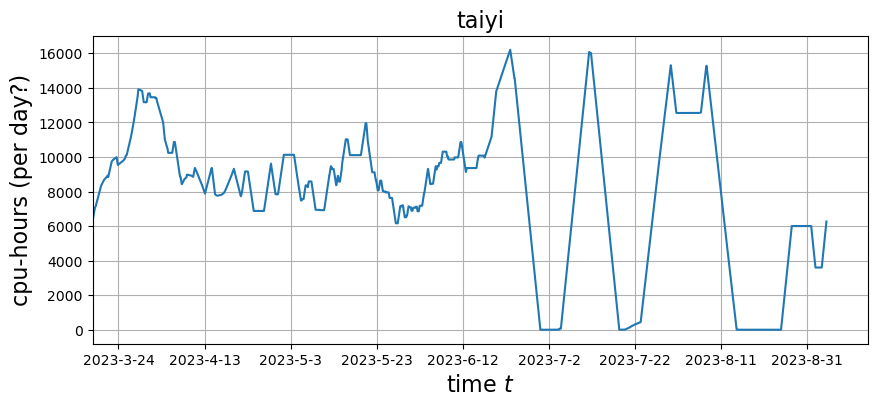

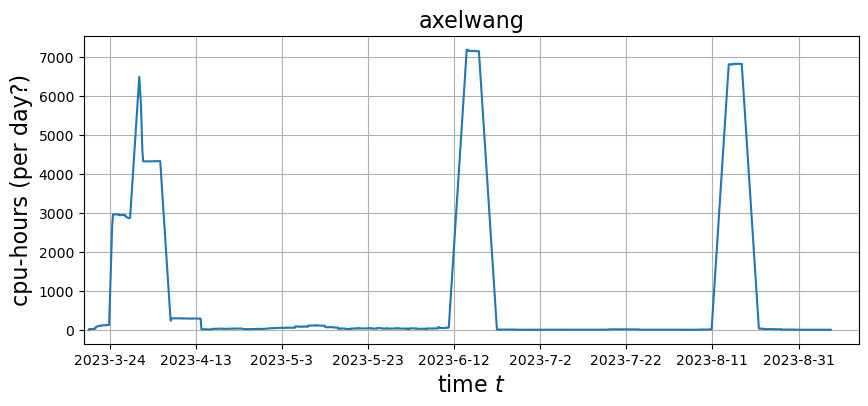

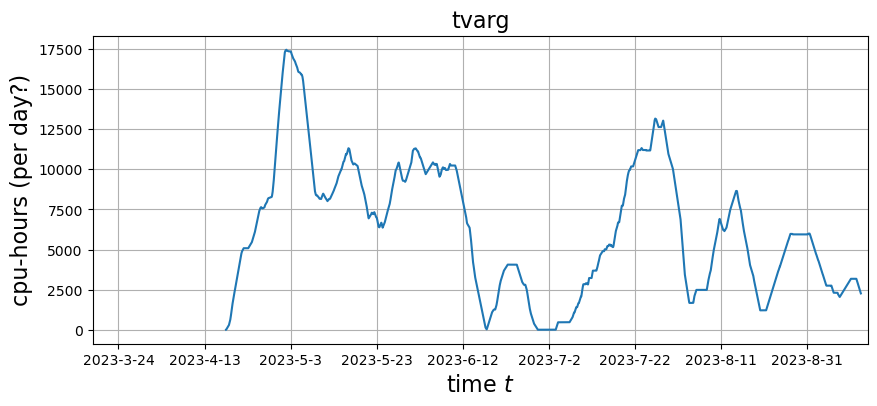

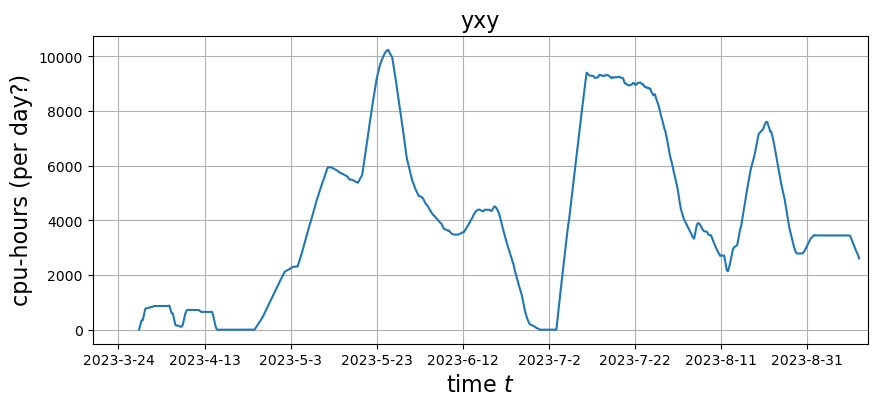

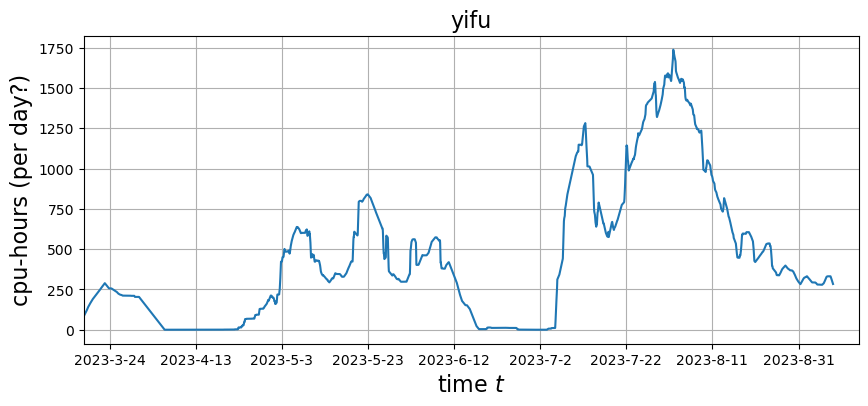

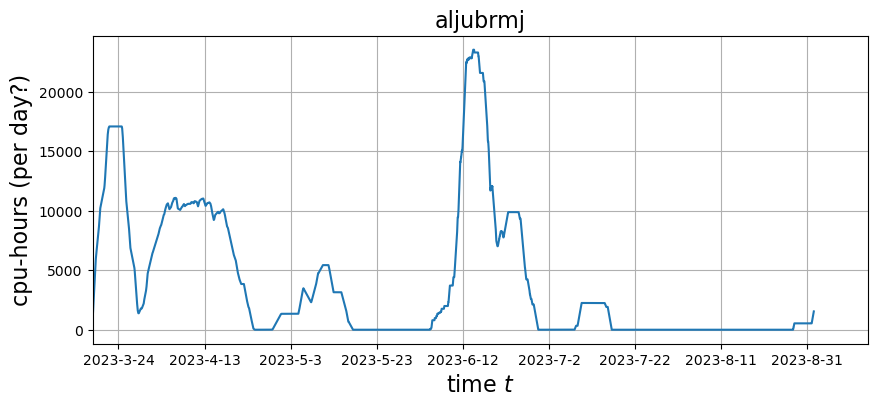

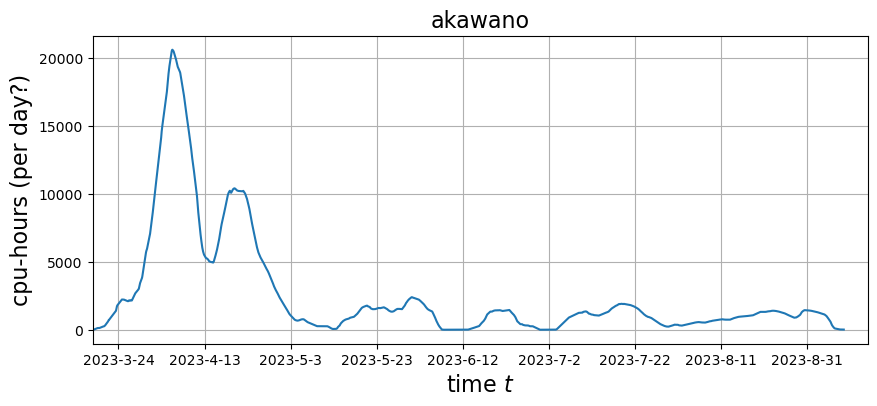

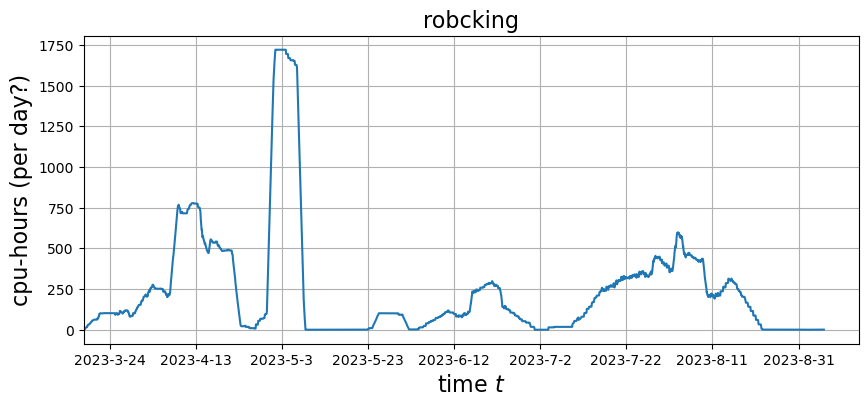

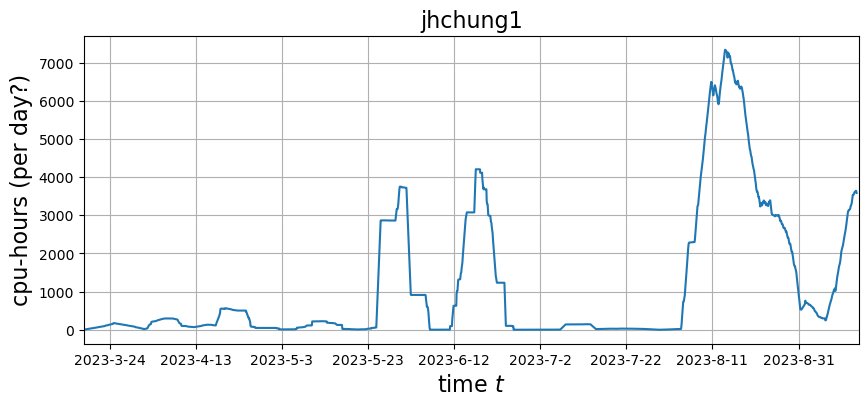

In [43]:
# This will be way too big to produce in notebooks, practically speaking at least..
# or maybe not, but we should do it last?
t0 = mpd.date2num(start_date)
t1 = mpd.date2num(end_date)
delim = chr(9)
delim = ';'
print('*** CPU-hours: ')
#print('**  Name,   cpu-hours,    job-hours,  last_job_start', )
print(delim.join(['Name', 'cpu-hours', 'job-hours', 'n_jobs', 'last_job_start', 'Group', 'Accounts', 'Partitions']))
jindex = {nm:k for k,nm in enumerate(jobs_pie_user['name'].astype(str))}
#print('** jindex: ', jindex)
for k, (nm,n) in enumerate(cpuh_pie_user[numpy.argsort(cpuh_pie_user['value'])[::-1]] ):
    if k>10: break
    #
    ix = SACCT_obj['User'].astype(type(nm)) == nm
    fg = plt.figure(figsize=(10,4))
    ax = fg.add_subplot(1,1,1)
    z = SACCT_obj.get_cpu_hours(jobs_summary=SACCT_obj[ix])
    ax.plot(z['time'], z['cpu_hours'], ls='-', marker='')
    ax.set_xlim(t0,t1)
    ax.grid()
    ax.set_xlabel('time $t$', size=16)
    ax.set_ylabel('cpu-hours (per day?)', size=16)
    #
    if isinstance(nm,bytes):
        nm = nm.decode()
    #
    ax.set_title(nm, size=16)
    #
    fg.canvas.draw()
    dt_epoch = hpc_lib.compute_mpd_epoch_dt(z['time'][0])
    lbls = [hpc_lib.simple_date_string(mpd.num2date(x + dt_epoch)) for x in ax.get_xticks()]
#     lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_value()))) + dt_epoch) )
#               for s in ax.get_xticklabels()]

    #
    #ax.set_xticklabels(lbls)
    # This should get rid of the FixedLocator warning? But I'm not sure it will...
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(lbls)
    #
    rw_vals = [nm, n, jobs_pie_user['value'][jindex[nm]], numpy.sum(ix).astype(int),\
          (None if numpy.isnan(numpy.nanmax(numpy.nanmax(SACCT_obj['Start'][ix]))) else mpd.num2date(numpy.nanmax(SACCT_obj['Start'][ix])) ),\
           SACCT_obj['Group'][ix].astype(str)[0],\
                ','.join(numpy.unique(SACCT_obj['Account'][ix]).astype(str)),\
                ','.join(numpy.unique(SACCT_obj['Partition'][ix]).astype(str))]
    print(delim.join([str(x) for x in rw_vals]))
#     print(f"{nm.decode()}, {n}, {jobs_pie_user['value'][jindex[nm]]},\
#           {mpd.num2date(max(SACCT_obj['Start'][ix]))}, {SACCT_obj['Group'][ix].astype(str)[0]},\
#                 {delim.join(numpy.unique(SACCT_obj['Account'][ix]).astype(str))},\
#                 {delim.join(numpy.unique(SACCT_obj['Partition'][ix]).astype(str))}\
#                 ")
#
# print('*** Jobs-time:')
# print('**  Name,   n_jobs,   last_job_start')
# for nm,n in jobs_pie_user[numpy.argsort(jobs_pie_user['value'])[::-1]]:
#     ix = SACCT_obj['User'].astype(type(nm)) == nm
#     print(f"**  {nm.decode()}, {n}, {mpd.num2date(max(SACCT_obj['Start'][ix]))}, {SACCT_obj['Group'][ix][0]}")

In [44]:
print('** ', ax)
print('** ', ax.get_xticklabels()[0].get_position()[0])
print('** ', ax.get_xticks())

**  Axes(0.125,0.11;0.775x0.77)
**  19420.0
**  [19420. 19440. 19460. 19480. 19500. 19520. 19540. 19560. 19580. 19600.
 19620.]


In [45]:
# Now, let's get a some reports for specific users, namely Lauren and Eric's former student(s) to estimate
#. requirements for their successors.
#
# Also, TODO: layer cake for active_cpus ?
# NOTE: for up and coming "how busy is the queue?" reporting, something like this:
# squeue -p serc --Format=jobid,jobarrayid,partition,username,state,timeused,timeleft,allocnodes,numnodes,numcpus


In [46]:
cpuh_jobs = SACCT_obj.get_cpu_hours(bin_size=1., n_points=5000)

In [47]:
cpuh_layers = SACCT_obj.get_cpu_hours_layer_cake(bin_size=1.)

***  [('time', '>f8'), ('serc', '>f8')]
***  [19427.49927083 19427.53647764 19427.57368444 19427.61089124
 19427.64809804 19427.68530485 19427.72251165 19427.75971845
 19427.79692525 19427.83413206]


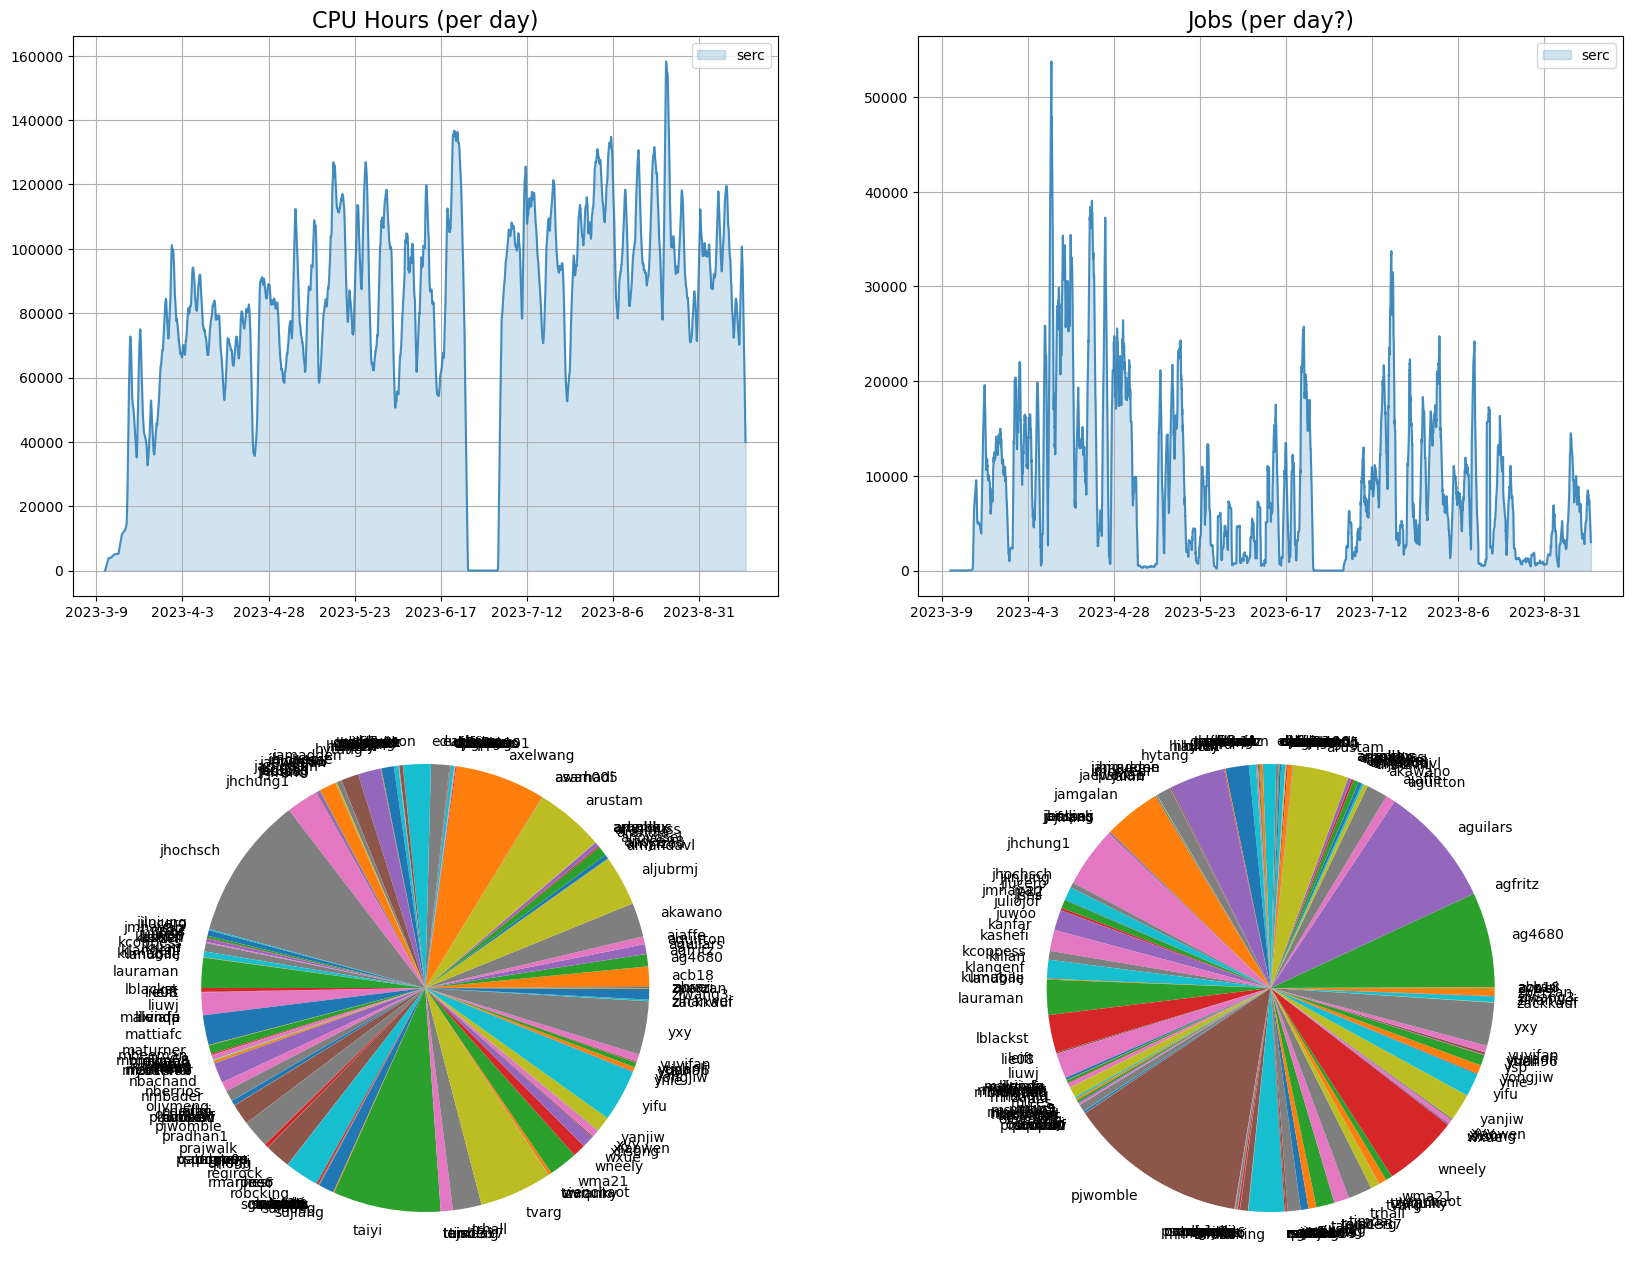

In [48]:
fg = plt.figure(figsize=(20,16))
ax1 = fg.add_subplot(2,2,1)
ax2 = fg.add_subplot(2,2,2)
ax3 = fg.add_subplot(2,2,3)
ax4 = fg.add_subplot(2,2,4)
ax1.grid()
ax2.grid()
#
ax1.set_title('CPU Hours (per day)', size=16)
ax2.set_title('Jobs (per day?)', size=16)
#
cpuh = cpuh_layers['cpu_hours']
jobs = cpuh_layers['jobs']
T = cpuh['time']

print('*** ', cpuh.dtype)
print('*** ', cpuh['time'][0:10])

#
z_cpuh = hpc_lib.plot_layer_cake(data=cpuh, layers=cpuh.dtype.names[1:], time_col='time', ax=ax1)
z_jobs = hpc_lib.plot_layer_cake(data=jobs, layers=cpuh.dtype.names[1:], time_col='time', ax=ax2)
#
# pi charts. left: cpu-hours, right job-time
pi_cpuh = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed']*SACCT_obj['NCPUS'], slice_data=SACCT_obj['User'])
pi_cpuh_lbls = pi_cpuh['name']
pi_cpuh_vls  = pi_cpuh['value']

pi_jobs = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed'], slice_data=SACCT_obj['User'])
pi_jobs_lbls = pi_jobs['name']
pi_jobs_vls  = pi_jobs['value']
#
ax3.pie(pi_cpuh_vls, labels=pi_cpuh_lbls)
ax4.pie(pi_jobs_vls, labels=pi_jobs_lbls)
#
ax1.legend(loc=0)
ax2.legend(loc=0)
#
# fg.canvas.draw()
# for ax in (ax1, ax2):
#     lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text()))) + SACCT_obj.dt_mpd_epoch ) ) 
#              for s in ax.get_xticklabels()]
#     ax.set_xticklabels(lbls)
#fg.canvas.draw()
#lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text())))) ) 
#         for s in ax1.get_xticklabels()]
#ax1.set_xticklabels(lbls)


### SERC GPU activity

In [49]:
# serc_h5 = 'sacct_data/serc_sacct_20211126_20220525.h5'
# SACCT_serc = hpc_lib.SACCT_data_from_h5(serc_h5, keep_raw_data=False, n_cpu=n_cpus)

# serc_gpu_activity = SACCT_serc.active_jobs_cpu(jobs_summary=None, bin_size=1., 
#                                                NCPUs=SACCT_serc.get_NGPUs())

SACCT_serc = SACCT_obj

### GPUs:
For now, hijack the SACCT.get_active_cpus_layer_cake() function, but force the "CPUs" column to use GPUs.

In [50]:
gpu_layers = SACCT_serc.get_active_cpus_layer_cake(layer_field='Group', NCPUs=SACCT_serc.get_NGPUs())

*** DEBUG t_now: 19613.568469976457, t_max: 19613.49607638889


/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:719: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if NCPUs is None or NCPUs=='':


TypeError: First element of field tuple is neither a tuple nor str

In [ ]:
pi_gpu_grps = [s for s in gpu_layers['N_cpu'].dtype.names[1:]]
#print(f'** {pi_gpu_lbls}' )
#
NGPU = SACCT_serc.get_NGPUs()
#
#pi_gpu_vals = numpy.zeros(len(pi_gpu_lbls))
pi_gpu_vals = []
pi_gpu_lbls = []
for k,g in enumerate(pi_gpu_grps):
    ix = SACCT_serc.jobs_summary['Group'].astype(str)==g
    #
    n_gpus = numpy.sum(SACCT_serc.jobs_summary['Elapsed'][ix] * NGPU[ix])
    if n_gpus <= 0.:
        continue
    #
    pi_gpu_vals += [n_gpus]
    pi_gpu_lbls += [f'{g}: {pi_gpu_vals[-1]:.1f}']
#
#print('** vals: ', pi_gpu_vals)
#pi_gpu_lbls = [f'{s}: {v:.1f}' for s,v in zip(pi_gpu_lbls, pi_gpu_vals) ]


fg = plt.figure(figsize=(16,14))
ax1 = fg.add_subplot(2,1,1)
ax2 = fg.add_subplot(2,2,3)
ax3 = fg.add_subplot(2,2,4)
ax1.grid()
#ax2.grid()
ax3.grid()
#
hpc_lib.plot_layer_cake(gpu_layers['N_cpu'], ax=ax1)
z_gpus = ax1.lines[-1].get_ydata()
qs = [.5, .75, .9]
qs_gpu = numpy.quantile(z_gpus, qs)
#
print('*** keys(): ', gpu_layers.keys())
ax2.pie(pi_gpu_vals, labels=pi_gpu_lbls) 
ax2.legend(loc=0)
#
hh_cpus = ax3.hist(z_gpus, bins=100, cumulative=True, density=True, histtype='step', lw=3.)
for x,y in zip(qs_gpu, qs):
    #ax3.plot([0., qs_cpus[-1], qs_cpus[-1]], [qs[-1], qs[-1], 0.], ls='--', color='r', lw=2. )
    ax3.plot([0., x, x], [y, y, 0.], ls='--', lw=2., label=f'{y*100.}th %: {x:.0f} gpus' )

ax1.set_title('Active GPUs', size=16)
ax3.legend(loc=0)


In [ ]:
print('** ', gpu_layers['N_cpu'].dtype.names)

In [ ]:
cpu_jobs_serc = SACCT_serc.active_jobs_cpu()


In [ ]:
serc_cpu_qs = numpy.quantile(cpu_jobs_serc['N_cpu'], [.5, .75, .9])
print('** qs: ', serc_cpu_qs)

In [ ]:
print('*** dtypes...: ', SACCT_obj.jobs_summary.dtype.names)

In [ ]:
print('*** ', SACCT_obj['ReqMem'][100:150])

In [ ]:
print('** ', numpy.unique(SACCT_obj['NGPUs']))
ix_gpu = SACCT_obj['NGPUs']>0
ix_cpu = numpy.invert(ix_gpu)
#
sacct_gpus = SACCT_obj.jobs_summary[ix_gpu]
#mem_per_gpu= SACCT_server[]
#
print('*** ', len(SACCT_serc.jobs_summary), len(sacct_gpus))
#
mem_per_gpu = (sacct_gpus['ReqMem']/sacct_gpus['NGPUs'])/10**9
mem_per_cpu = (SACCT_obj['ReqMem'][ix_cpu] / SACCT_obj['NCPUS'][ix_cpu])/10**9

req_mem = SACCT_obj['ReqMem']/10**9.
#
fg = plt.figure(figsize=(10,8))
ax1 = fg.add_subplot(1,1,1)
#ax2 = fg.add_subplot(1,2,2)
#
hh_gpu = ax1.hist(mem_per_gpu, bins=10)

##hh_cpu = ax2.hist(mem_per_cpu, bins=20)
#hh_cpu = ax2.hist( (SACCT_obj['ReqMem']/(1024**3)), bins=2)
#
ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.grid()
ax2.grid()
#fg.suptitle('Requested Memory', size=16)
ax1.set_title('ReqMem/GPU')

In [ ]:
print('** ', numpy.unique(SACCT_obj['NGPUs']))
ix_gpu = SACCT_obj['NGPUs']>0
ix_cpu = numpy.invert(ix_gpu)
#
sacct_gpus = SACCT_obj.jobs_summary[ix_gpu]
#mem_per_gpu= SACCT_server[]
#
print('*** ', len(SACCT_serc.jobs_summary), len(sacct_gpus))
#
mem_per_gpu = (sacct_gpus['MaxRSS']/sacct_gpus['NGPUs'])/10**9
mem_per_cpu = (SACCT_obj['MaxRSS'] / SACCT_obj['NCPUS'])/10**9

req_mem = SACCT_obj['MaxRSS']/1**9.
#
fg = plt.figure(figsize=(10,6))
ax1 = fg.add_subplot(1,2,1)
ax2 = fg.add_subplot(1,2,2)
#
hh_gpu = ax1.hist(mem_per_gpu, bins=10)
ax1.set_yscale('log')
ax2.set_yscale('log')


#hh_cpu = ax2.hist(mem_per_cpu, bins=20)
hh_cpu = ax2.hist(SACCT_obj['MaxRSS'], bins=20)
#
ax1.grid()
ax2.grid()
fg.suptitle('MaxRSS', size=16)

In [ ]:
fg = plt.figure(figsize=(12,8))
ax1 = fg.add_subplot(1,1,1)
#
active_req_mem = SACCT_obj.active_jobs_cpu(NCPUs=SACCT_obj['ReqMem'][ix_gpu], jobs_summary=SACCT_obj.jobs_summary[ix_gpu])
ARM = active_req_mem
#
total_mem = 10*1024*1024**3 + 2*192*1024**3
#total_mem = 10*1024*10**9 + 2*192*10**9
#
ax1.plot(ARM['time'], ARM['N_cpu']/total_mem, ls='-')
#
#ax1.plot(ARM['time'][0::len(ARM['time'])-1], numpy.ones(2)*total_mem, ls='--', color='m')
ax1.plot(ARM['time'][0::len(ARM['time'])-1], numpy.ones(2), ls='--', color='m')
ax1.grid()
ax1.set_title('Total ReqMem for GPU jobs', size=16)
lbls = hpc_lib.fg_time_labels_to_dates(ax1)

In [ ]:
print('** ', active_req_mem.dtype)

In [ ]:
print('*** ', hpc_lib.kmg_to_num('105k'))
print('** ', [hpc_lib.kmg_to_num(s) for s in ['11k', '11m', '11M', '11g']])
print('** ', [hpc_lib.kmg_to_num(s) for s in ['11', '11.3', '', 's']])

In [ ]:
print('** ', SACCT_obj.jobs_summary.dtype.names)

### Some Seasonality reports:
NOTE: Some reports being moved to hpc_reports module.

In [ ]:
cpu_seasonality = SACCT_obj.active_cpu_jobs_per_day_hour_report(qs=[.45, .5, .9], periodic_projection='polar')

In [ ]:
SACCT_rep = hpc_reports.SACCT_report_handler(SACCT_obj=SACCT_obj, Short_title='SERC, 2023-4',
                                Full_title="SERC HPC Analytics, April 2023", out_path='output/SERC_202304',
                                            )

In [ ]:
zz = SACCT_rep.cpu_hourly_activity_report()

In [ ]:
print(mem_per_cpu[0:500])

##  A Group report:
- specify group; all partitions.

In [52]:
grp_group='oneillm'
grp_partition=None
SACCT_obj_grp = hpc_lib.SACCT_data_direct(group=grp_group, partition=grp_partition, start_date=str(start_date),
                                          n_cpu=n_cpus, verbose=verbose, delim=delim_sacct,
                                          end_date=str(end_date), keep_raw_data=False)

***  2023-03-18 00:00:00+00:00 <class 'datetime.datetime'> 2023-09-14 00:00:00+00:00 <class 'datetime.datetime'>
*** DEBUG: Now execute load_sacct_data(); options_str= --group=oneillm  --delimiter="*" 
*** DEBUG: load_sacct_data() executed. Compute calc_jobs_summary()
*** DEBUG: data stuff:  25656 (numpy.record, [('index', '<i8'), ('User', 'O'), ('Group', 'O'), ('GID', 'O'), ('Account', 'O'), ('JobID', 'O'), ('JobIDRaw', 'O'), ('Partition', 'O'), ('State', 'O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('ReqMem', '<f8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'O'), ('Suspended', 'O'), ('ReqTRES', 'O'), ('AllocTRES', 'O'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), ('MaxDiskRead', '<f8'), ('AveDiskWrite', '<f8'), ('AveDiskRead', '<f8'), ('JobID_parent', 'O'

/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3050: RuntimeWarning: All-NaN slice encountered
  jobs_summary[cls][k] = tuple([f(sub_data[n2]) for (n1, n2, f) in js_col_f])
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2872: RuntimeWarning: All-NaN slice encountered
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2872: RuntimeWarning: invalid value encountered in cast
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\


*** DEBUG t_now: 19613.580984829816, t_max: 19613.49318287037


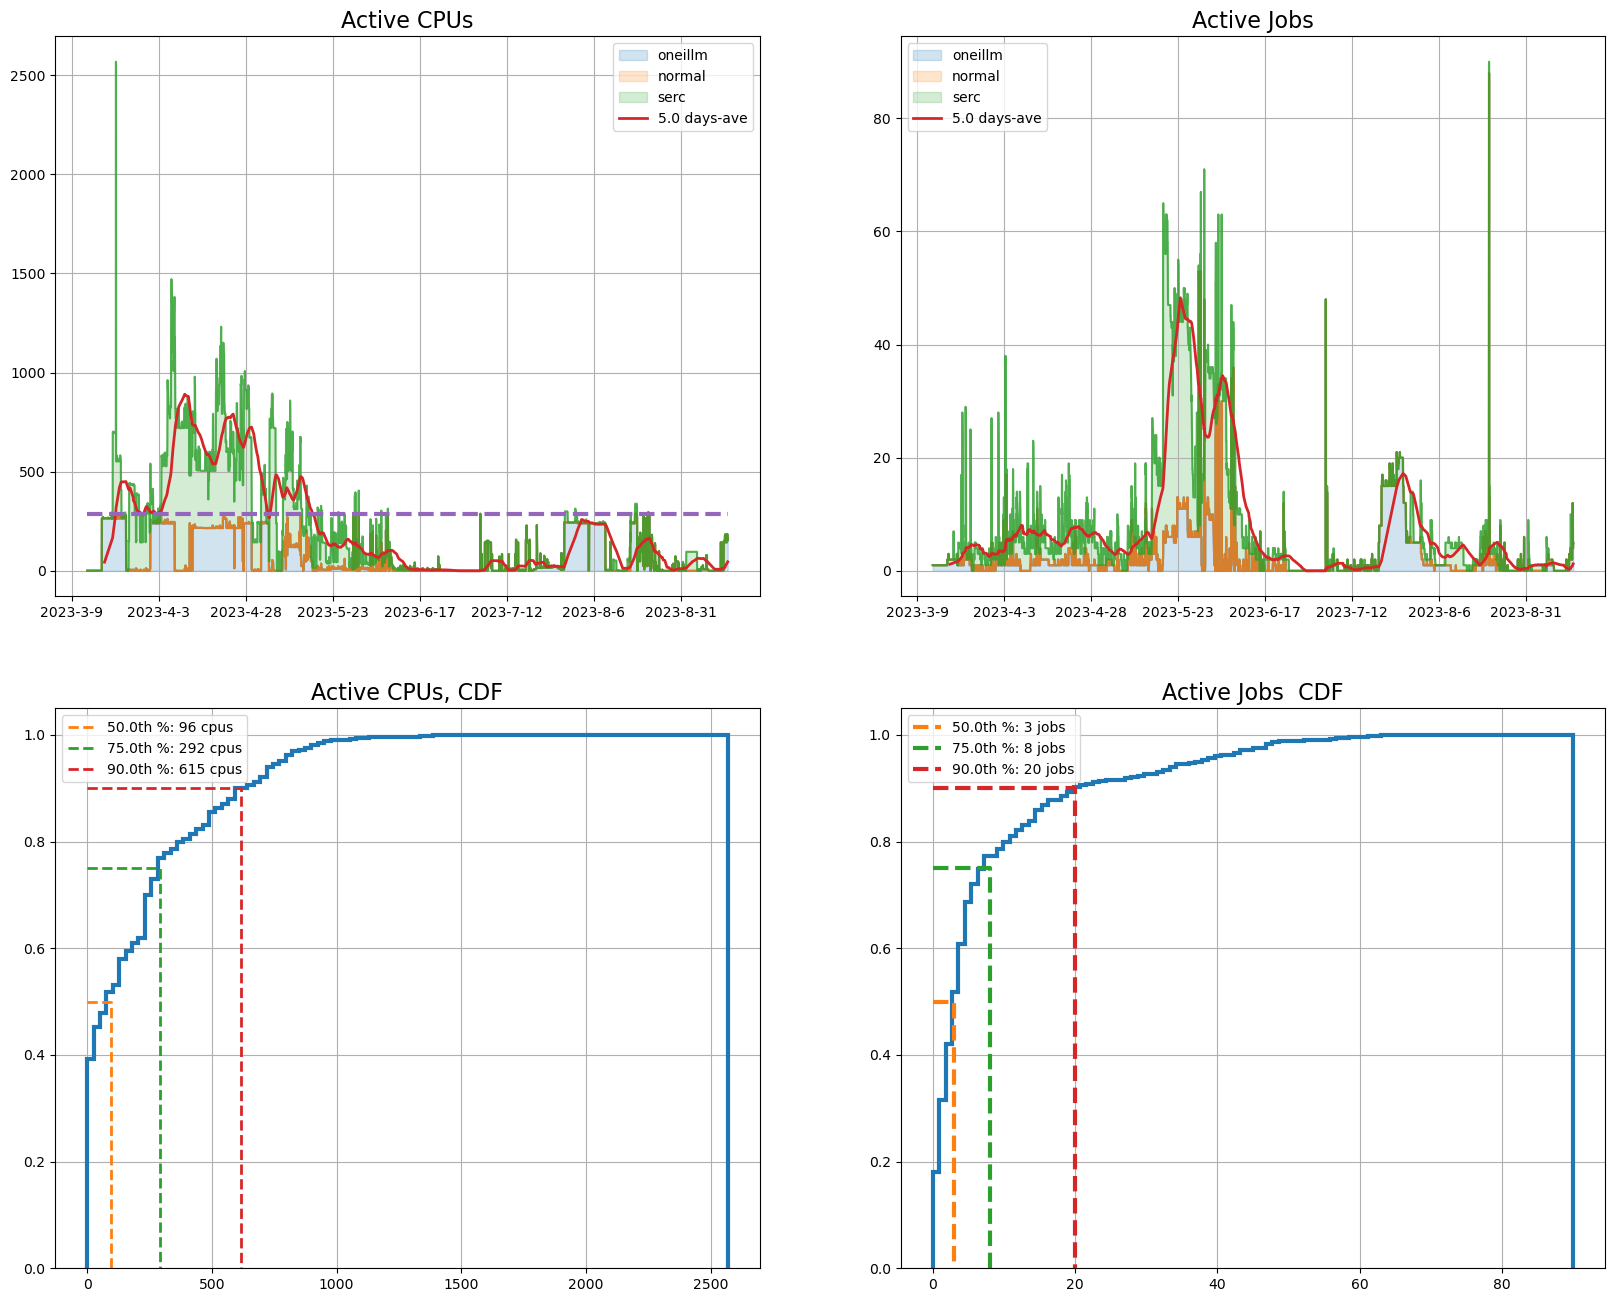

In [63]:
fg_cpu_lc_acct = SACCT_obj_grp.report_activecpus_jobs_layercake_and_CDFs(group_by='Partition')

ax = fg_cpu_lc_acct.axes[0]
ln_ = ax.lines[0]
X = ln_.get_xdata()
#
ax.plot(X[0::(len(X)-1)], (12*24)*numpy.ones(2), ls='--', lw=3)

In [62]:
print('** ', len(X))
print('** ', X[0::len(X)-1])

**  5000
**  [19429.46878472 19613.49318287]


In [58]:
ln_ = ax.lines[0]
X = ln_.get_xdata()


array([19429.46878472, 19429.50559696, 19429.54240921, ...,
       19613.41955839, 19613.45637063, 19613.49318287])